                                 Metric      Value
0              Mean (Nerves Normalized)   0.611808
1      95% CI Lower (Nerves Normalized)   0.414459
2      95% CI Upper (Nerves Normalized)   0.809158
3             Mean (Muscles Normalized)   0.506919
4     95% CI Lower (Muscles Normalized)   0.286603
5     95% CI Upper (Muscles Normalized)   0.727236
6          Mean (Normalized Percentage)  67.483659
7  95% CI Lower (Normalized Percentage)  44.135373
8  95% CI Upper (Normalized Percentage)  90.831946


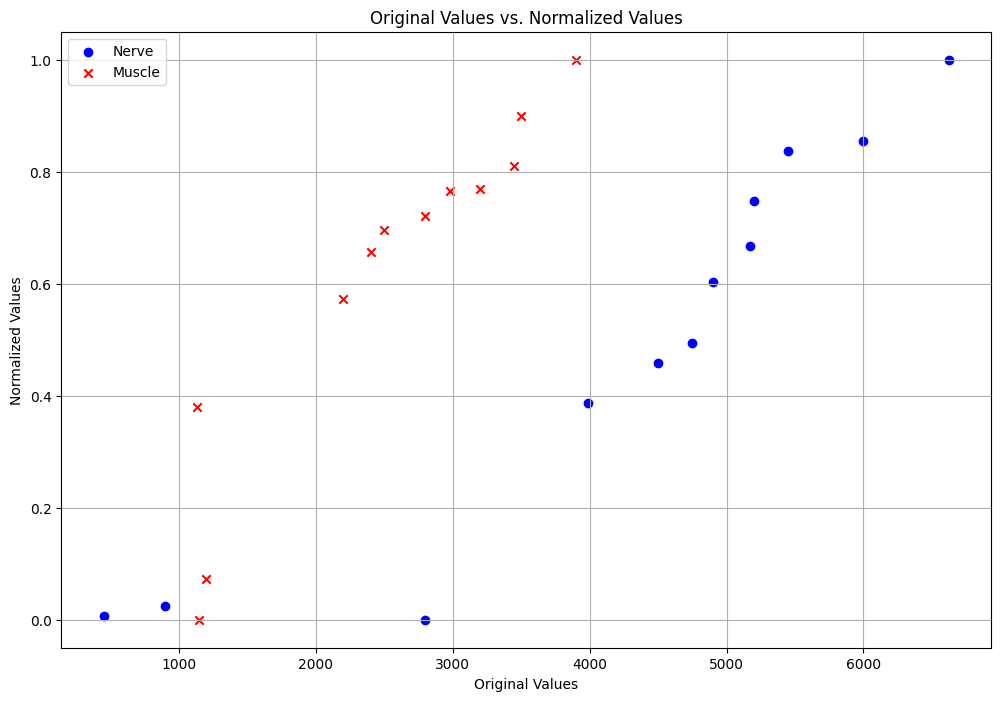

In [1]:
from statistics import mean, stdev, median, variance
import scipy.stats as stats
from matplotlib import pyplot as plt
import pandas as pd

# Data
nerves = [6625, 6000, 5450, 5200, 5175, 4900, 4750, 4500, 3985, 900, 450, 2800]
muscles = [3900, 3500, 3450, 3200, 2980, 2800, 2500, 2400, 2200, 1200, 1150, 1130]

# Normalization function
def normalize(data):
    min_val = min(data)
    max_val = max(data)
    return [(x - min_val) / (max_val - min_val) for x in data]

# Normalize the data
nerves_normalized = normalize(nerves)
muscles_normalized = normalize(muscles)

# Convert normalized muscle data to percentages of normalized nerve data
def convert_to_percentage(nerves_normalized, muscles_normalized):
    return [(m / n) * 100 if n != 0 else 0 for m, n in zip(muscles_normalized, nerves_normalized)]

normalized_percentage = convert_to_percentage(nerves_normalized, muscles_normalized)

# Function to calculate confidence interval
def calculate_confidence_interval(data, confidence=0.95):
    mean_val = mean(data)
    std_err = stdev(data) / (len(data) ** 0.5)
    margin_of_error = std_err * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

# Calculate statistics for normalized data
mean_nerves_normalized, ci_low_nerves_normalized, ci_high_nerves_normalized = calculate_confidence_interval(nerves_normalized)
mean_muscles_normalized, ci_low_muscles_normalized, ci_high_muscles_normalized = calculate_confidence_interval(muscles_normalized)
mean_normalized_percentage, ci_low_percentage, ci_high_percentage = calculate_confidence_interval(normalized_percentage)

# Print results in a table
results = {
    "Metric": ["Mean (Nerves Normalized)", "95% CI Lower (Nerves Normalized)", "95% CI Upper (Nerves Normalized)",
               "Mean (Muscles Normalized)", "95% CI Lower (Muscles Normalized)", "95% CI Upper (Muscles Normalized)",
               "Mean (Normalized Percentage)", "95% CI Lower (Normalized Percentage)", "95% CI Upper (Normalized Percentage)"],
    "Value": [mean_nerves_normalized, ci_low_nerves_normalized, ci_high_nerves_normalized,
              mean_muscles_normalized, ci_low_muscles_normalized, ci_high_muscles_normalized,
              mean_normalized_percentage, ci_low_percentage, ci_high_percentage]
}

df_results = pd.DataFrame(results)
print(df_results)

# Scatter Plot original values on the x-axis and normalized data on the y-axis
plt.figure(figsize=(12, 8))
plt.scatter(nerves, muscles_normalized, color='blue', marker='o', label='Nerve')
plt.scatter(muscles, nerves_normalized, color='red', marker='x', label='Muscle')
plt.title('Original Values vs. Normalized Values')
plt.xlabel('Original Values')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()
